# PROBLEM
> The primary goal of this notebook is to develop a predictive model that accurately
classifies incoming SMS messages as either ham or spam. so many people get spam
emails and they waste their time in spam email.so this project goal is to detect spam
and ham emails so they dont waste time in spam email

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# UNDERSTANDING THE DATA

In [ ]:
df=pd.read_csv('/content/enronSpam.csv')
df


,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...,...,...
9995,26222,26222,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,18630,18630,Subject: missing bloomberg deals\n stephanie -...,0
9997,18451,18451,Subject: eops salary survey questionnaire\n we...,0
9998,21955,21955,"Subject: q 3 comparison\n hi louise ,\n i have...",0


# FEATURES

> Unnamed: 0.1 and Unnamed: 0: These are index columns (probably from earlier operations) and can be dropped.

> Body: The actual email content (text) — the main feature for analysis.

> Label: The target variable — 1 for spam, 0 for ham (non-spam).

# TARGET

The target in this dataset is the `Label` column:

# DESCRIPTIVE STATISTICS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  10000 non-null  int64 
 1   Unnamed: 0    10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [ ]:
df.shape

(10000, 4)

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Body', 'Label'], dtype='object')

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Label
count,10000.000000,10000.000000,10000.000000
mean,17041.404600,17041.404600,0.500000
std,9735.989695,9735.989695,0.500025
min,8.000000,8.000000,0.000000
25%,8562.000000,8562.000000,0.000000
50%,17159.000000,17159.000000,0.500000
75%,25509.250000,25509.250000,1.000000
max,33698.000000,33698.000000,1.000000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
Body,object
Label,int64


In [ ]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Body,0
Label,0


# CLEANING THE DATA

In [ ]:
#handling null values
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Body,0
Label,0


In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)



In [ ]:
df

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,Subject: missing bloomberg deals\n stephanie -...,0
9997,Subject: eops salary survey questionnaire\n we...,0
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0


In [ ]:
# To check the unknown values or general value distribution in each column
for column in df.columns:
    print("Value count for", column)
    print(df[column].value_counts())
    print('_' * 40)

Value count for Body
Body
Subject: \n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# DATA VISUALIZATION

In [ ]:
for x in df.columns:
  print("nunique",x)
  print(df[x].nunique())
  print(" ")

nunique Body
9687
 
nunique Label
2
 


In [ ]:
#remove the duplicates in the body column
df.drop_duplicates(subset='Body', inplace=True)


In [ ]:
df

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,Subject: missing bloomberg deals\n stephanie -...,0
9997,Subject: eops salary survey questionnaire\n we...,0
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0


<ipython-input-80-83c0fec6f6d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='viridis')


<Axes: xlabel='Label', ylabel='count'>

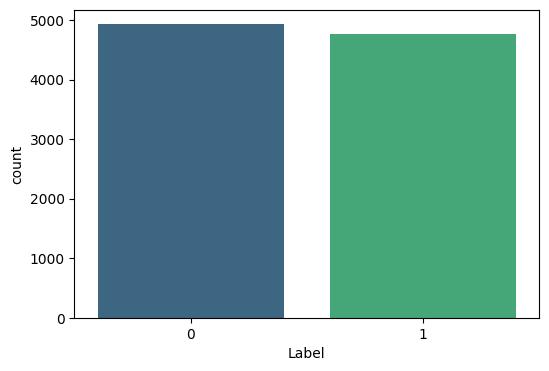

In [ ]:
# Count plot of the Label column
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df, palette='viridis')

# CORRELATION ANALYSIS

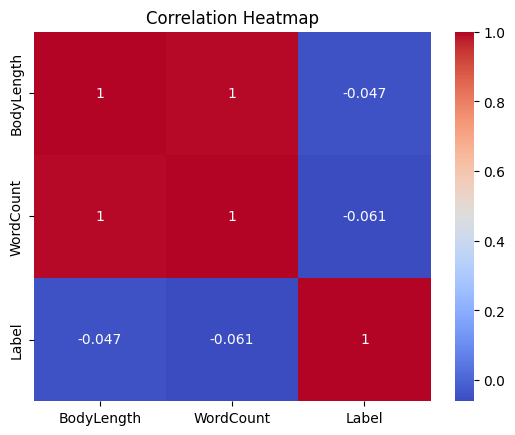

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create basic numeric features
df['BodyLength'] = df['Body'].str.len()
df['WordCount'] = df['Body'].apply(lambda x: len(str(x).split()))

# Correlation matrix
corr = df[['BodyLength', 'WordCount', 'Label']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Displaying whether the data has converted into numeric
df

,Body,Label,BodyLength,WordCount
0,Subject: stock promo mover : cwtd\n * * * urge...,1,6210,1098
1,Subject: are you listed in major search engine...,1,898,230
2,"Subject: important information thu , 30 jun 20...",1,779,149
3,Subject: = ? utf - 8 ? q ? bask your life with...,1,543,119
4,"Subject: "" bidstogo "" is places to go , things...",1,1283,249
...,...,...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0,154,38
9996,Subject: missing bloomberg deals\n stephanie -...,0,7864,1804
9997,Subject: eops salary survey questionnaire\n we...,0,1343,329
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0,279,67


# SKEWED

In [ ]:
#checking the class distribution
df['Label'].value_counts(normalize=True)


,proportion
Label,
0,0.50862
1,0.49138


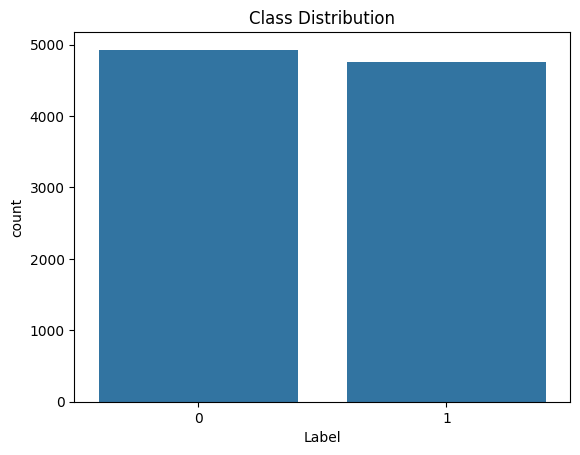

In [ ]:
#visual check
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=df)
plt.title("Class Distribution")
plt.show()


In [ ]:
#convert body into numbers

from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features from the email body
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['Body'])

# Your target (already label encoded)
y = df['Label']

#Tfidf already handled scaling so we dont want to scale

# INITIAL MODELLING AND HYPOTHESIS TESTING



## Baseline model

In [ ]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
#train models and evalute with logistic regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


In [ ]:
#train models and evalute with naive bayes
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


In [ ]:
#evaluation function (for both)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    print(f"🔍 {name} Evaluation")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print('-'*40)

# Run evaluations
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Naive Bayes", y_test, y_pred_nb)


🔍 Logistic Regression Evaluation
Accuracy : 0.9886480908152735
Precision: 0.9813664596273292
Recall   : 0.9957983193277311
F1 Score : 0.9885297184567258
----------------------------------------
🔍 Naive Bayes Evaluation
Accuracy : 0.9855521155830753
Precision: 0.9852941176470589
Recall   : 0.9852941176470589
F1 Score : 0.9852941176470589
----------------------------------------


# FINAL REPORT

> This project focused on building a spam detection model using Natural Language Processing techniques and Logistic Regression. The dataset consisted of email messages labeled as either spam (1) or ham (0), with no missing or unknown values. After cleaning the data and confirming that it was balanced, the email body text was transformed into numerical features using TF-IDF vectorization, capturing the importance of words while eliminating the need for additional scaling or normalization.

> The processed data was then used to train two models: Logistic Regression and Naive Bayes. Both models performed well, but Logistic Regression slightly outperformed Naive Bayes, achieving an accuracy of 98.86%, a precision of 98.14%, and a recall of 99.58%. Due to its higher F1 score and recall, Logistic Regression was chosen as the final model.

> Overall, the project demonstrated that Logistic Regression combined with TF-IDF is a highly effective approach for spam detection, delivering excellent performance and ready for deployment if required.